In [211]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bri-data-hackathon-people-analytic/sample_submission.csv
/kaggle/input/bri-data-hackathon-people-analytic/train.csv
/kaggle/input/bri-data-hackathon-people-analytic/test.csv


In [212]:
import seaborn as sns
import matplotlib.pyplot as plt


data_sub = '/kaggle/input/bri-data-hackathon-people-analytic/sample_submission.csv'
df_sub = pd.read_csv(data_sub)
df_sub.head()

,index,Best Performance
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [213]:
df_train = '/kaggle/input/bri-data-hackathon-people-analytic/train.csv'
df_test = '/kaggle/input/bri-data-hackathon-people-analytic/test.csv'

data_train = pd.read_csv(df_train)
data_test = pd.read_csv(df_test)

print(data_train.shape)
print(data_test.shape)

(22005, 30)
(6000, 29)


In [214]:
data_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [215]:
data_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached


In [216]:
data_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [217]:
data_train.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                      

In [218]:
data_test.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Avg_achieve

In [219]:
data_train.dtypes

job_level                                 object
job_duration_in_current_job_level        float64
person_level                              object
job_duration_in_current_person_level     float64
job_duration_in_current_branch           float64
Employee_type                             object
Employee_status                           object
gender                                    object
age                                        int64
marital_status_maried(Y/N)                object
number_of_dependences                      int64
number_of_dependences (male)               int64
number_of_dependences (female)             int64
Education_level                           object
GPA                                      float64
year_graduated                            object
job_duration_as_permanent_worker         float64
job_duration_from_training                 int64
branch_rotation                            int64
job_rotation                               int64
assign_of_otherposit

In [220]:
data_train.nunique()

job_level                                    4
job_duration_in_current_job_level          102
person_level                                 8
job_duration_in_current_person_level        86
job_duration_in_current_branch              71
Employee_type                                3
Employee_status                              2
gender                                       2
age                                         37
marital_status_maried(Y/N)                   2
number_of_dependences                        7
number_of_dependences (male)                 5
number_of_dependences (female)               5
Education_level                              6
GPA                                        241
year_graduated                              52
job_duration_as_permanent_worker            33
job_duration_from_training                  34
branch_rotation                             20
job_rotation                                15
assign_of_otherposition                     30
annual leave 

In [221]:
data1 = data_train.copy()
data2 = data_test.copy()

In [222]:
def mising_val_table(data):
    mising_val = data.isnull().sum()
    presentase_mising_val = 100 * data.isnull().sum()/len(data)
    
    table = pd.concat([mising_val, presentase_mising_val], axis=1)
    table = table.rename(columns = {
        0 : "Mising Values",
        1 : "% of Total Values" 
    })
    
    table = table.sort_values(
        by="% of Total Values",
        ascending = False
    )
    
    return table

In [223]:
data1.shape

(22005, 30)

In [224]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

In [225]:
mising_val_table(data1)

,Mising Values,% of Total Values
achievement_target_3,6727,30.570325
achievement_target_2,6727,30.570325
achievement_target_1,6727,30.570325
Achievement_above_100%_during3quartal,6302,28.638946
Last_achievement_%,6302,28.638946
Avg_achievement_%,6289,28.579868
Education_level,3608,16.396274
GPA,3503,15.919109
year_graduated,3503,15.919109
job_duration_as_permanent_worker,2055,9.338787


In [226]:
mising_val_table(data2)

,Mising Values,% of Total Values
job_level,0,0.0
year_graduated,0,0.0
achievement_target_2,0,0.0
achievement_target_1,0,0.0
Achievement_above_100%_during3quartal,0,0.0
Last_achievement_%,0,0.0
Avg_achievement_%,0,0.0
sick_leaves,0,0.0
annual leave,0,0.0
assign_of_otherposition,0,0.0


In [227]:
data1["Employee_type"].value_counts()

RM_type_A    11030
RM_type_B    10211
RM_type_C      752
Name: Employee_type, dtype: int64

In [228]:
rma = 11030
rmb = 10211
rmc = 752
n = 3
hasil = (rma+rmb+rmc)/3
hasil

7331.0

**Fiture engineering untuk kolom "Employe_type": Tipe Pekerja**

In [229]:
type_pekerjaan = pd.isnull(data1["Employee_type"])
data1[type_pekerjaan]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
7279,JG03,4.00,PG01,4.00,0.33,NaN,Permanent,Male,1990,N,...,0,5,10,0,NaN,NaN,NaN,NaN,NaN,NaN
9187,JG03,5.17,PG02,4.00,0.92,NaN,Permanent,Male,1980,Y,...,1,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN
10732,JG03,3.58,PG02,0.50,0.67,NaN,Permanent,Female,1990,Y,...,0,5,4,0,NaN,NaN,NaN,NaN,NaN,NaN
11734,JG04,1.08,PG03,1.08,0.00,NaN,Permanent,Male,1985,Y,...,0,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN
11769,JG03,3.58,PG02,0.50,1.42,NaN,Permanent,Male,1986,Y,...,0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
12718,JG03,4.17,PG02,1.00,0.17,NaN,Permanent,Female,1985,Y,...,0,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14384,JG03,3.00,PG01,3.00,0.25,NaN,Permanent,Male,1985,Y,...,1,6,1,0,NaN,NaN,NaN,NaN,NaN,NaN
14433,JG03,7.00,PG02,3.50,0.33,NaN,Permanent,Male,1983,Y,...,2,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
14454,JG03,3.75,PG02,0.50,0.25,NaN,Permanent,Female,1989,Y,...,1,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN
15246,JG03,4.17,PG02,1.00,0.42,NaN,Permanent,Male,1987,Y,...,0,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
data1a = data1.copy()
data2a = data2.copy()

In [231]:
data1a["Employee_type"].fillna("RM_type_B", inplace=True)

In [232]:
data1a["Employee_type"].value_counts()

RM_type_A    11030
RM_type_B    10223
RM_type_C      752
Name: Employee_type, dtype: int64

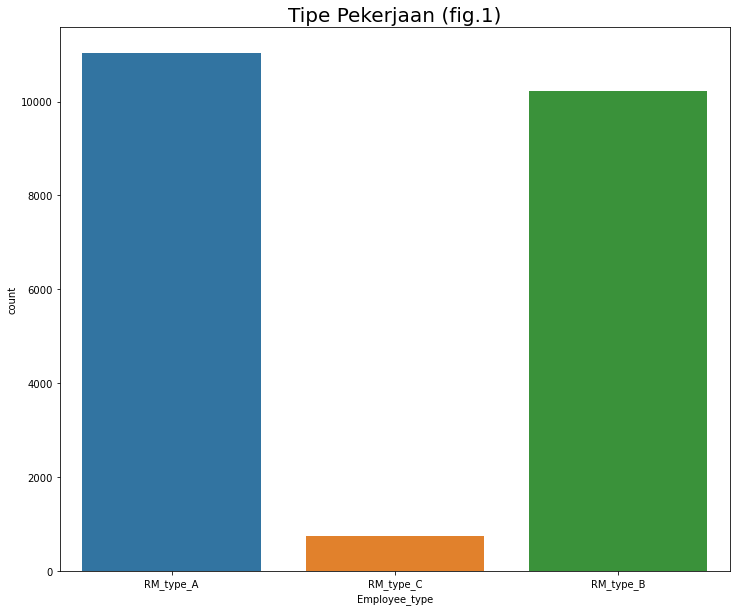

In [233]:
label = ['RM_type_A','RM_type_B','RM_type_C']
sns.countplot(x = "Employee_type", data = data1a)
plt.title("Tipe Pekerjaan (fig.1)", fontsize=20)
plt.show()


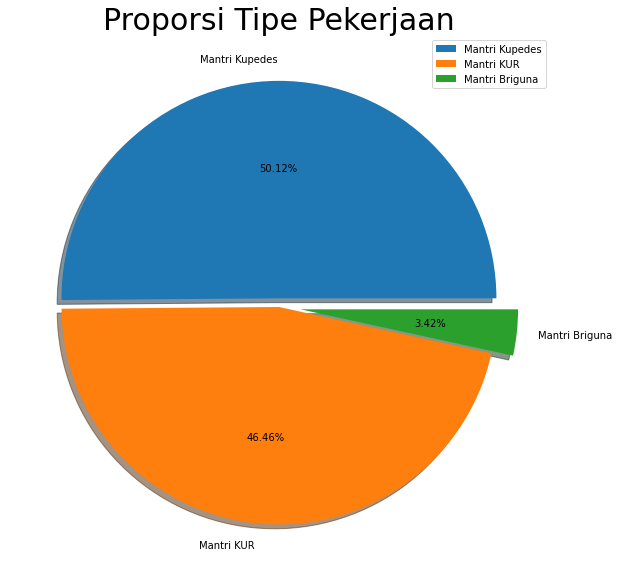

Total Jumlah Pekerja Berdasarkan Tipe Pekerjaan: 

RM_type_A    11030
RM_type_B    10223
RM_type_C      752
Name: Employee_type, dtype: int64


In [234]:
val_data_train = data1a["Employee_type"].value_counts()

label = ['Mantri Kupedes','Mantri KUR','Mantri Briguna']
explode = [0.04, 0, 0.1]

plt.rcParams['figure.figsize']=(12,10)
plt.title("Proporsi Tipe Pekerjaan", fontsize=30)
plt.pie(val_data_train, labels=label, explode=explode, shadow=True, autopct='%.2f%%')
plt.legend()
plt.show()


print("Total Jumlah Pekerja Berdasarkan Tipe Pekerjaan: \n")
print(val_data_train)

In [235]:
data1a["job_duration_as_permanent_worker"].isnull().sum()

2055

In [236]:
data1a["job_duration_as_permanent_worker"]=data1a["job_duration_as_permanent_worker"].fillna(data1a["job_duration_as_permanent_worker"].mean())
data1a["job_duration_as_permanent_worker"].isnull().sum()

0

In [237]:
data1a["GPA"].isnull().sum()

3503

In [238]:
data1a["GPA"]=data1a["GPA"].fillna(data1a["GPA"].mean())
data1a["GPA"].isnull().sum()

0

In [239]:
data1a["Avg_achievement_%"].isnull().sum()

6289

In [240]:
data1a["Avg_achievement_%"]=data1a["Avg_achievement_%"].fillna(data1a["Avg_achievement_%"].mean())
data1a["Avg_achievement_%"].isnull().sum()

0

In [241]:
data1a["Last_achievement_%"].isnull().sum()

6302

In [242]:
data1a["Last_achievement_%"]=data1a["Last_achievement_%"].fillna(data1a["Last_achievement_%"].mean())
data1a["Last_achievement_%"].isnull().sum()

0

In [243]:
data1a["Achievement_above_100%_during3quartal"].isnull().sum()

6302

In [244]:
data1a["Achievement_above_100%_during3quartal"]=data1a["Achievement_above_100%_during3quartal"].fillna(data1a["Achievement_above_100%_during3quartal"].mean())
data1a["Achievement_above_100%_during3quartal"].isnull().sum()

0

In [245]:
data1a["year_graduated"].isnull().sum()

3503

In [246]:
data1a["year_graduated"] = data1a["year_graduated"].fillna(data1a["year_graduated"].mode()[0])
data1a["year_graduated"].isnull().sum()

0

In [247]:
data1a["Education_level"] = data1a["Education_level"].fillna(data1a["Education_level"].mode()[0])
data1a["Education_level"].isnull().sum()

0

In [248]:
mising_val_table(data1a)

,Mising Values,% of Total Values
achievement_target_3,6727,30.570325
achievement_target_2,6727,30.570325
achievement_target_1,6727,30.570325
job_duration_in_current_job_level,0,0.000000
Achievement_above_100%_during3quartal,0,0.000000
Last_achievement_%,0,0.000000
Avg_achievement_%,0,0.000000
Best Performance,0,0.000000
sick_leaves,0,0.000000
annual leave,0,0.000000
